### **Data Diri **

*   Nama   : Cecilia Charlene Siani Silvyana Halim
*   Email  : sesiliaalen12@gmail.com

In [1]:
import tensorflow as tf
import zipfile
import os
import glob 
import sys
from tensorflow import keras
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip 

--2021-07-15 02:17:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.37MB/s    in 44s     

2021-07-15 02:18:17 (7.07 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/kelasml')
zip_ref.close()

In [5]:
dir_dataset = "/kelasml/rockpaperscissors/rps-cv-images"
dir_paper = os.path.join("/kelasml/rockpaperscissors/rps-cv-images/paper")
dir_rock = os.path.join("/kelasml/rockpaperscissors/rps-cv-images/rock")
dir_scissors = os.path.join("/kelasml/rockpaperscissors/rps-cv-images/scissors")

In [6]:
total_image = len(list(glob.iglob("/kelasml/rockpaperscissors/rps-cv-images/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

Total Data Image JPEG     :  2188


In [7]:
val_size = 0.2

Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [8]:
img_width = 150
img_height = 150

Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [9]:
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [17]:
batch_size = 16

with tf.device("/device:GPU:0"):
  history = Model.fit(Train_generator, 
                    epochs =  30, 
                    steps_per_epoch = 1751//batch_size, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//batch_size,
                    callbacks=[callbacks])

Epoch 1/30
109/109 [==============================] - 90s 829ms/step - loss: 0.1751 - accuracy: 0.9401 - val_loss: 0.1827 - val_accuracy: 0.9375
Epoch 2/30
109/109 [==============================] - 90s 824ms/step - loss: 0.1451 - accuracy: 0.9516 - val_loss: 0.1543 - val_accuracy: 0.9514

Akurasi telah mencapai >95%!


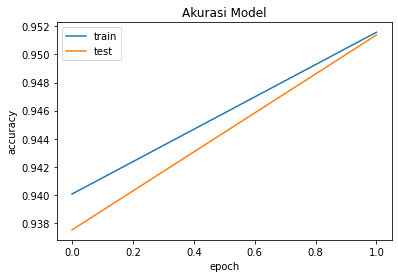

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

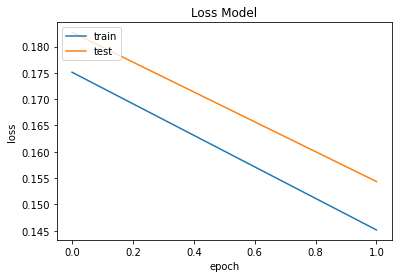

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
Scissor


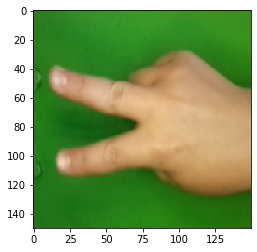

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  prob = Model.predict(images) 
  classes = prob.argmax(axis=1)
  
  if classes == 0:
    print("Paper")
  elif classes == 1:
    print("Rock")
  elif classes == 2:
    print("Scissor")

In [22]:
# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpffl3beh1/assets
